<a href="https://colab.research.google.com/github/marioleandrovanegas/Unidad2/blob/main/Unidad2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regresión lineal multiple

- Mario Leandro Vanegas Valencia

In [134]:
! git clone https://github.com/marioleandrovanegas/Unidad2.git

fatal: destination path 'Unidad2' already exists and is not an empty directory.


In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [136]:
data = pd.read_csv("/content/Unidad2/vivienda2.csv")

In [137]:
data.head()

,id,zona,piso,estrato,preciom,areaconst,parqueaderos,banios,habitaciones,tipo,barrio,longitud,latitud
0,1147.0,Zona Oriente,NaN,3.0,250.0,70.0,1.0,3.0,6.0,Casa,20 de julio,-76.51168,3.43382
1,1169.0,Zona Oriente,NaN,3.0,320.0,120.0,1.0,2.0,3.0,Casa,20 de julio,-76.51237,3.43369
2,1350.0,Zona Oriente,NaN,3.0,350.0,220.0,2.0,2.0,4.0,Casa,20 de julio,-76.51537,3.43566
3,5992.0,Zona Sur,2.0,4.0,400.0,280.0,3.0,5.0,3.0,Casa,3 de julio,-76.54000,3.43500
4,1212.0,Zona Norte,1.0,5.0,260.0,90.0,1.0,2.0,3.0,Apartamento,acopi,-76.51350,3.45891


In [138]:
df = data[(data["zona"] == "Zona Norte") & (data["tipo"] == "Casa")]
df.head()

,id,zona,piso,estrato,preciom,areaconst,parqueaderos,banios,habitaciones,tipo,barrio,longitud,latitud
8,1209.0,Zona Norte,2.0,5.0,320.0,150.0,2.0,4.0,6.0,Casa,acopi,-76.51341,3.47968
9,1592.0,Zona Norte,2.0,5.0,780.0,380.0,2.0,3.0,3.0,Casa,acopi,-76.51674,3.48721
10,4057.0,Zona Norte,2.0,6.0,750.0,445.0,NaN,7.0,6.0,Casa,acopi,-76.52950,3.38527
11,4460.0,Zona Norte,2.0,4.0,625.0,355.0,3.0,5.0,5.0,Casa,acopi,-76.53179,3.40590
12,6081.0,Zona Norte,2.0,5.0,750.0,237.0,2.0,6.0,6.0,Casa,acopi,-76.54044,3.36862


In [139]:
import folium

# Crear mapa centrado automáticamente a todos los puntos
m = folium.Map()
m.fit_bounds([[df["latitud"].min(), df["longitud"].min()],
              [df["latitud"].max(), df["longitud"].max()]])

# Agregar puntos
for _, fila in df.iterrows():
    folium.Marker(
        location=[fila["latitud"], fila["longitud"]],
        popup=f"Lat: {fila['latitud']}, Lon: {fila['longitud']}"
    ).add_to(m)

m.save("mapa.html")
m

Al analizar el mapa, se observa que en el norte de la zona se encuentra la mayor cantidad de puntos, como era de esperar, sin embargo se logran tener algunos puntos hacia el centro, este y sur de Cali. Esto puede organizarse al definir un limite de latitud y longitud que permita definir cuales son las zonas realmente, de esta forma se podrían re ubicar facilmente los puntos en la base de datos.

Al realizar una busqueda de las definiciones de las zonas, se encuentra que estas no tinen una base clara, es decir, no tienen una definición de latitudes, longitudes o zonas establecidas geograficamente; es decir, que principalmente sus zonificaciones se dan de acuerdo a los barrios o comunas que las componen, por lo tanto su expansión hace que se consideren zonas aledañas que no deberían estar asociadas.

Ahora procedo a realizar una segunda selección de los datos, donde se incluyan los puntos que se encuentran al norte de la ciudad desde la latitud.

Como latitud base se toma Lat: 3.45407, es decir, que todo lo que este sobre esta latitud entrará en el norte de la ciudad. por otra parte, lo que este a la izquierda de la longitd Lon: -76.53969 no se tendrá en cuenta, pues hará parte del oriente de la ciudad.




In [140]:
df = data[(data["latitud"]> 3.45407) & (data["longitud"]> -76.53969) & (data["tipo"]=="Casa")]
# Crear mapa centrado automáticamente a todos los puntos
m = folium.Map()
m.fit_bounds([[df["latitud"].min(), df["longitud"].min()],
              [df["latitud"].max(), df["longitud"].max()]])

# Agregar puntos
for _, fila in df.iterrows():
    folium.Marker(
        location=[fila["latitud"], fila["longitud"]],
        popup=f"Lat: {fila['latitud']}, Lon: {fila['longitud']}"
    ).add_to(m)

m.save("mapa.html")
m

In [141]:
df.shape

(608, 13)

In [142]:
df.dtypes

,0
id,float64
zona,object
piso,float64
estrato,float64
preciom,float64
areaconst,float64
parqueaderos,float64
banios,float64
habitaciones,float64
tipo,object


Se observa que el estrato aparece como tipo flotante, sin embargo esta variable debe ser tipo categórico, por esta razón se realizara la conversión a ese tipo

In [143]:
df["estrato"] = df["estrato"].astype("category")


/tmp/ipython-input-446961903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["estrato"] = df["estrato"].astype("category")


In [144]:
df.dtypes

,0
id,float64
zona,object
piso,float64
estrato,category
preciom,float64
areaconst,float64
parqueaderos,float64
banios,float64
habitaciones,float64
tipo,object


Ahora se realiza un análisis de estadística descriptiva.

In [145]:
df_desc = df.drop( labels = ["id","longitud","latitud"], axis = 1)
df_desc.describe()

,piso,preciom,areaconst,parqueaderos,banios,habitaciones
count,349.000000,608.000000,608.000000,407.000000,608.000000,608.000000
mean,1.991404,426.070724,257.093141,2.211302,3.496711,4.582237
std,0.839017,267.599531,173.619607,1.483761,1.480234,1.783084
min,1.000000,85.000000,30.000000,1.000000,0.000000,0.000000
25%,1.000000,242.250000,134.500000,1.000000,2.000000,3.000000
50%,2.000000,362.500000,230.000000,2.000000,3.000000,4.000000
75%,2.000000,530.000000,335.250000,3.000000,4.000000,5.000000
max,10.000000,1800.000000,1500.000000,10.000000,10.000000,10.000000


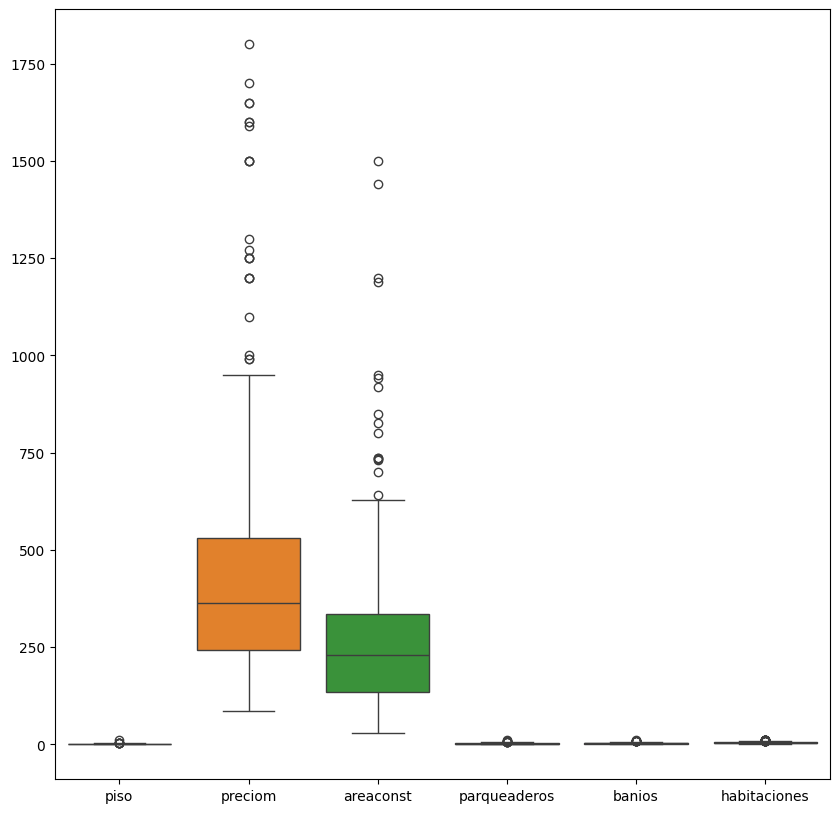

In [146]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df_desc)
plt.show()

Correlaciones

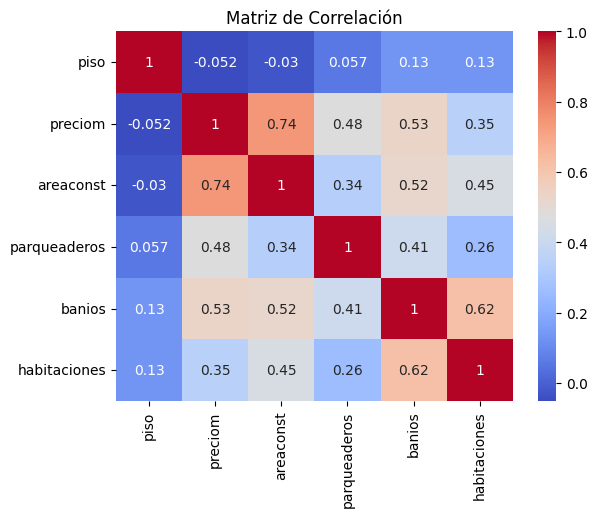

In [147]:
# Graficar
df_corr = df_desc.drop(labels = ["zona","tipo","barrio","estrato"], axis =1)
corr = df_corr.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

inicialmente se realiza una correlación incluyendo la variable precio para comprender si se tiene una correlación con alguna de las variables, donde se observa una clara correlación entre el precio y el área construida. por esta razón no se imputan los datos de precio y área construida.


Modelo de regresión Lineal

Las variables independientes para la estimación del modelo son:
- Precio
- área construida
- Estrato
- Número de cuartos
- Número de parqueaderos
- Número de baños

In [148]:
X = df_corr.drop(labels = "preciom", axis = 1)
y = df['preciom']
X.head()

,piso,areaconst,parqueaderos,banios,habitaciones
8,2.0,150.0,2.0,4.0,6.0
9,2.0,380.0,2.0,3.0,3.0
30,NaN,120.0,NaN,3.0,3.0
34,NaN,455.0,NaN,5.0,4.0
42,NaN,300.0,NaN,5.0,8.0


In [149]:
# encontrar valores faltantes
X.isna().sum()
# Los pisos y los baños tienen datos nulos, estos serán imputados por la mediana, sin embargo, existen otros métodos con los que se podría imputar al aplicar métodos que permitan
x_piso = X['piso'].mean()
x_parqueo = X['parqueaderos'].mean()
X['piso'] = X['piso'].fillna(x_piso)
X['parqueaderos'] = X['parqueaderos'].fillna(x_parqueo)
X.isna().sum()

,0
piso,0
areaconst,0
parqueaderos,0
banios,0
habitaciones,0


In [150]:
# Separa los datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Tamaño entrenamiento:", X_train.shape[0])
print("Tamaño prueba:", X_test.shape[0])

Tamaño entrenamiento: 486
Tamaño prueba: 122


In [151]:
modelo = LinearRegression()
modelo.fit(X_train,y_train)
print("Intercepto:", modelo.intercept_)
print("Coeficientes:", modelo.coef_)

Intercepto: 52.66348955169576
Coeficientes: [-11.09583828   1.00431523  30.07524788  40.95072815 -15.84748653]


Al analizar los resultados, se obtiene la siguiente ecuación:

$ \text{preciom} = 77.74 - 28.74 \times \text{piso} + 0.99 \times \text{areaconst} + 20.82 \times \text{parqueaderos} + 45.50 \times \text{baños} - 9.86 \times \text{habitaciones}$

Como conclusiones:

	- El área construida, los baños y los parqueaderos incrementan fuertemente el precio.
	- El piso y las habitaciones aparecen con coeficientes negativos.
	- El intercepto es simplemente un punto de referencia.


Coeficientes R2

In [152]:
y_pred = modelo.predict(X_train)

In [153]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_train, y_pred)
print("R2:", r2)
# RMSE y MAE también son útiles
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
mae = mean_absolute_error(y_train, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)

R2: 0.6462396491744289
RMSE: 153.83133656030097
MAE: 101.3675756040461


De acuerdo con el resultado obtenido para $R2$, teniendo en cuenta que su aplicación no es aplicable a una labor de ingeniería o medicina, donde se requiere un resultado superior, se concidera aceptable el resultado actual, sin embargo este resultado puede mejroar al realizar algunos ajustes, entre los que se propone por ejemplo:



Validación de supuestos

A continuación se presenta la validación de los supuestos de normalidad, homocedasticidad de la varianza e independencia.

Se debe tener en cuenta que la homocedasticidad evalua uno de los supuestos principales de la regresión lineal multiple, como lo es la varianza constante de los errores, donde los residuops del modelo deberían tener una varianza constante en todos los niveles de las variables independientes., en caso de no cumplirse este supuesto, las prubas de significancia no serían confiables.

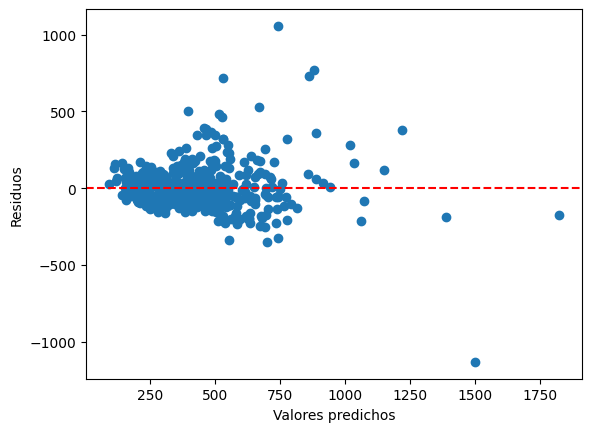

In [154]:
residuos = y_train-y_pred
plt.scatter(y_pred, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.show()

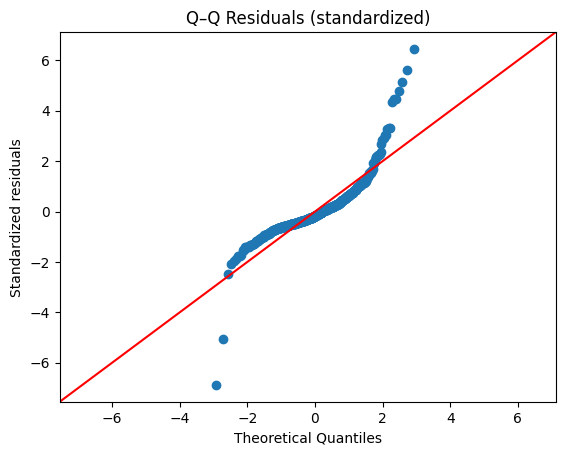

In [155]:


# Residuos estandarizados internos
std_res = mod.get_influence().resid_studentized_internal

# Q–Q plot
sm.graphics.qqplot(std_res, line="45")
plt.title("Q–Q Residuals (standardized)")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized residuals")
plt.show()

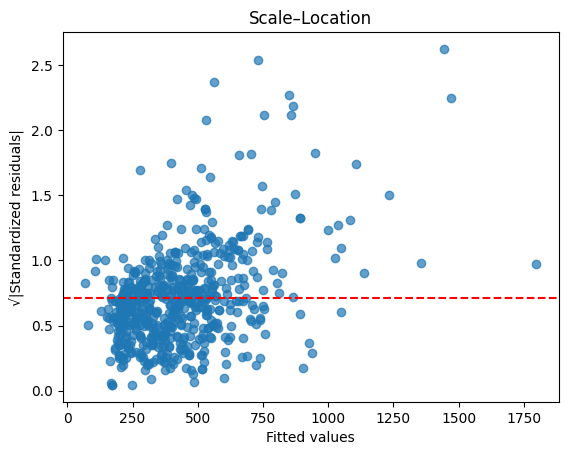

In [156]:
# 2. Obtener residuos estandarizados internos
std_res = mod.get_influence().resid_studentized_internal
fitted = mod.fittedvalues

# 3. Calcular raíz de los residuos estandarizados
sqrt_std_res = np.sqrt(np.abs(std_res))

# 4. Graficar Scale–Location
plt.scatter(fitted, sqrt_std_res, alpha=0.7)
plt.axhline(y=np.mean(sqrt_std_res), color="red", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("√|Standardized residuals|")
plt.title("Scale–Location")
plt.show()

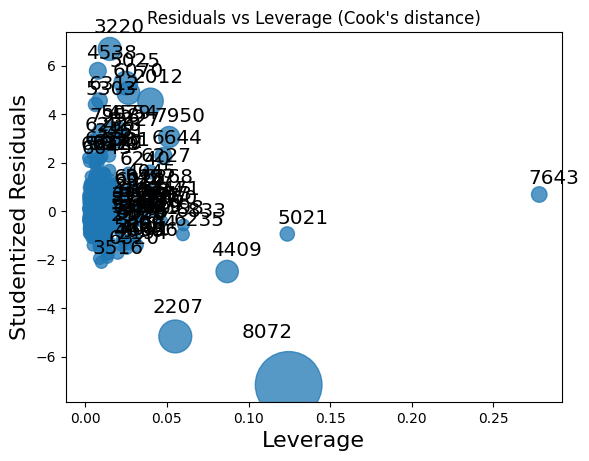

In [157]:
# Gráfico de influencia estilo R
sm.graphics.influence_plot(mod, criterion="cooks")  # muestra leverage, resid est. y tamaño ~ Cook
plt.title("Residuals vs Leverage (Cook's distance)")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                preciom   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     192.0
Date:                Mon, 01 Sep 2025   Prob (F-statistic):          4.54e-122
Time:                        03:53:58   Log-Likelihood:                -3970.8
No. Observations:                 608   AIC:                             7954.
Df Residuals:                     602   BIC:                             7980.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           64.9394     28.688      2.264   

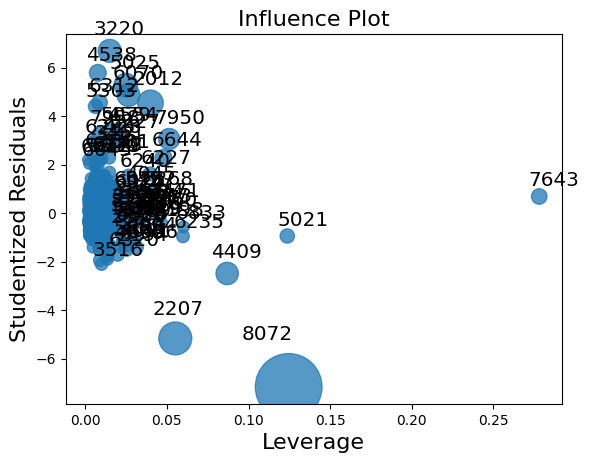

In [158]:
 import statsmodels.api as sm
import matplotlib.pyplot as plt

# Supongamos que ya tienes X (independientes) y y (dependiente)
# Ejemplo:
# y = df["preciom"]
# X = df[["piso", "areaconst", "parqueaderos", "banios", "habitaciones"]]

# 1. Agregar constante
Xc = sm.add_constant(X)

# 2. Ajustar modelo OLS
mod = sm.OLS(y, Xc).fit()

# 3. Resumen del modelo
print(mod.summary())

# 4. Gráfico de influencia (Cook’s distance + leverage + residuos estandarizados)
sm.graphics.influence_plot(mod, criterion="cooks")
plt.show()